In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
connection= engine.connect()
Base= automap_base()
Base.prepare(engine,reflect=True)

# Save references to each table
Measurement= Base.classes.measurement
Station = Base.classes.station

#Create our session (link) from Python to the DB
session = Session(engine)

# reflect the tables
print(engine.table_names())

['measurement', 'station']


/var/folders/w0/9z4__wj50wxdphvsv05bdwy80000gn/T/ipykernel_12807/2881248232.py:14: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [16]:
# View all of the classes that automap found
print(engine.table_names())

['measurement', 'station']


/var/folders/w0/9z4__wj50wxdphvsv05bdwy80000gn/T/ipykernel_12807/3479169192.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [17]:
# Find the most recent date in the data set.
date= session.query(Measurement.date).all()
print(date[len(date)-1][0])

2017-08-23


In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>'2016-08-23').order_by(Measurement.date).all()
print(prcp_data)


In [41]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
import pandas as pd
prcp_data_pd_df = pd.DataFrame(prcp_data)
prcp_data_pd_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


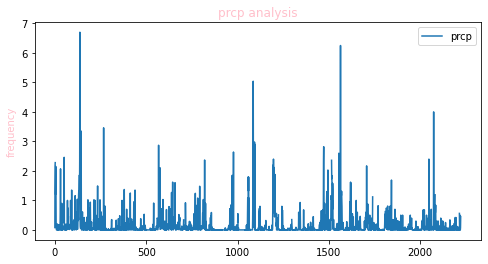

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.pyplot as plt 
prcp_data_pd_df.set_index('date').head()
x = prcp_data_pd_df.plot(figsize=(8,4))
x.set_title("prcp analysis").set_color('pink')
x.set_ylabel('frequency').set_color('pink')
plt.show()

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data_pd_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [48]:
# Design a query to calculate the total number stations in the dataset
total_station=session.query(Measurement).group_by(Measurement.station).count()
print(total_station)

9


In [79]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# use lambda and sort to sort out thte list of tuples then reverse to set active_station in desc order
active_station= session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).all()
active_station.sort(key=lambda y:y[1])
active_station.reverse()
print(active_station)



[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_Id=active_station[0][0]
print(active_station_Id)

# query the active station to get lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station==active_station_Id).all()


In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tmp_result=session.query(Measurement.tobs).filter(Measurement.station==active_station_Id).filter(Measurement.date>'2016-08-23').order_by(Measurement.date.desc()).all()

In [91]:
#save the query result as pd dataframe
tmp_result_df = pd.DataFrame(tmp_result)
tmp_result_df.head(10)

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0
5,77.0
6,83.0
7,82.0
8,77.0
9,76.0


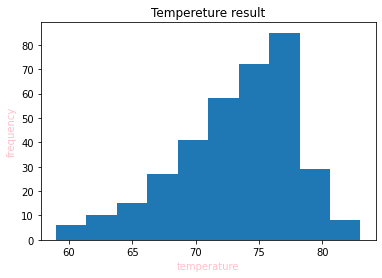

In [99]:
# plot the histogram
plt.hist(tmp_result_df['tobs'])
plt.xlabel("temperature").set_color('pink')
plt.ylabel("frequency").set_color('pink')
plt.title("Tempereture result")
plt.show()

In [100]:
# Close Session
session.close()